# Tratamento dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_treino = pd.read_csv('dataset_treino.csv', na_filter=False)
data_teste = pd.read_csv('dataset_teste.csv', na_filter=False)

In [3]:
data_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     11016 non-null  object 
 1   Normal (kWh)             11016 non-null  float64
 2   Horário Económico (kWh)  11016 non-null  float64
 3   Autoconsumo (kWh)        11016 non-null  float64
 4   Injeção na rede (kWh)    11016 non-null  object 
 5   temp                     11016 non-null  float64
 6   feels_like               11016 non-null  float64
 7   temp_min                 11016 non-null  float64
 8   temp_max                 11016 non-null  float64
 9   pressure                 11016 non-null  int64  
 10  humidity                 11016 non-null  int64  
 11  wind_speed               11016 non-null  float64
 12  rain_1h                  11016 non-null  float64
 13  clouds_all               11016 non-null  int64  
 14  weather_description   

In [4]:
data_teste.nunique()

Data                       2256
Normal (kWh)                709
Horário Económico (kWh)     490
Autoconsumo (kWh)           485
temp                       1013
feels_like                 1192
temp_min                    271
temp_max                    280
pressure                     31
humidity                     76
wind_speed                  556
rain_1h                     124
clouds_all                  101
weather_description           8
dtype: int64

In [5]:
data_treino.drop(columns=['Data'], inplace=True)
data_teste.drop(columns=['Data'], inplace=True)

## One-Hot Encoding de **weather_description**

In [6]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(data_treino['weather_description'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

data_treino = pd.concat([data_treino, lb_results_df], axis=1)
data_treino.drop(columns=['weather_description'], inplace=True)
data_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   Injeção na rede (kWh)    11016 non-null  object 
 4   temp                     11016 non-null  float64
 5   feels_like               11016 non-null  float64
 6   temp_min                 11016 non-null  float64
 7   temp_max                 11016 non-null  float64
 8   pressure                 11016 non-null  int64  
 9   humidity                 11016 non-null  int64  
 10  wind_speed               11016 non-null  float64
 11  rain_1h                  11016 non-null  float64
 12  clouds_all               11016 non-null  int64  
 13  broken clouds            11016 non-null  int32  
 14  few clouds            

In [7]:
lb = LabelBinarizer()
lb_results = lb.fit_transform(data_teste['weather_description'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

data_teste = pd.concat([data_teste, lb_results_df], axis=1)
data_teste.drop(columns=['weather_description'], inplace=True)
data_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             2256 non-null   float64
 1   Horário Económico (kWh)  2256 non-null   float64
 2   Autoconsumo (kWh)        2256 non-null   float64
 3   temp                     2256 non-null   float64
 4   feels_like               2256 non-null   float64
 5   temp_min                 2256 non-null   float64
 6   temp_max                 2256 non-null   float64
 7   pressure                 2256 non-null   int64  
 8   humidity                 2256 non-null   int64  
 9   wind_speed               2256 non-null   float64
 10  rain_1h                  2256 non-null   float64
 11  clouds_all               2256 non-null   int64  
 12  broken clouds            2256 non-null   int32  
 13  few clouds               2256 non-null   int32  
 14  heavy intensity rain    

### Conversão de types 64 para types 32

In [8]:
float_features = data_treino.select_dtypes(include='float')
int_features = data_treino.select_dtypes(include='int')

data_treino[float_features.columns] = data_treino[float_features.columns].astype(np.float32)
data_treino[int_features.columns] = data_treino[int_features.columns].astype(np.int32)
data_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float32
 1   Horário Económico (kWh)  11016 non-null  float32
 2   Autoconsumo (kWh)        11016 non-null  float32
 3   Injeção na rede (kWh)    11016 non-null  object 
 4   temp                     11016 non-null  float32
 5   feels_like               11016 non-null  float32
 6   temp_min                 11016 non-null  float32
 7   temp_max                 11016 non-null  float32
 8   pressure                 11016 non-null  int32  
 9   humidity                 11016 non-null  int32  
 10  wind_speed               11016 non-null  float32
 11  rain_1h                  11016 non-null  float32
 12  clouds_all               11016 non-null  int32  
 13  broken clouds            11016 non-null  int32  
 14  few clouds            

In [9]:
float_features = data_teste.select_dtypes(include='float')
int_features = data_teste.select_dtypes(include='int')

data_teste[float_features.columns] = data_teste[float_features.columns].astype(np.float32)
data_teste[int_features.columns] = data_teste[int_features.columns].astype(np.int32)
data_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             2256 non-null   float32
 1   Horário Económico (kWh)  2256 non-null   float32
 2   Autoconsumo (kWh)        2256 non-null   float32
 3   temp                     2256 non-null   float32
 4   feels_like               2256 non-null   float32
 5   temp_min                 2256 non-null   float32
 6   temp_max                 2256 non-null   float32
 7   pressure                 2256 non-null   int32  
 8   humidity                 2256 non-null   int32  
 9   wind_speed               2256 non-null   float32
 10  rain_1h                  2256 non-null   float32
 11  clouds_all               2256 non-null   int32  
 12  broken clouds            2256 non-null   int32  
 13  few clouds               2256 non-null   int32  
 14  heavy intensity rain    

### Normalize data

In [10]:
from sklearn.preprocessing import MinMaxScaler
data_treino_normalize = data_treino.copy()
data_teste_normalize = data_teste.copy()

X_scale = data_treino_normalize.drop(columns=['Injeção na rede (kWh)'])

scaler_X = MinMaxScaler(feature_range=(0,1)).fit(X_scale)
scaler_y = MinMaxScaler(feature_range=(0,1)).fit(data_teste_normalize)
X_scale = pd.DataFrame(scaler_X.transform(X_scale[X_scale.columns]), columns=X_scale.columns)
data_teste_normalize = pd.DataFrame(scaler_y.transform(data_teste_normalize[data_teste_normalize.columns]), columns=data_teste_normalize.columns)

data_treino_normalize = pd.concat([X_scale, data_treino_normalize['Injeção na rede (kWh)']], axis=1)

data_treino_normalize.head()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,...,clouds_all,broken clouds,few clouds,heavy intensity rain,light rain,moderate rain,overcast clouds,scattered clouds,sky is clear,Injeção na rede (kWh)
0,0.0,0.0,0.0,0.336788,0.361443,0.323608,0.316800,0.825,0.765432,0.172101,...,0.87,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,None
1,0.0,0.0,0.0,0.324698,0.349494,0.376606,0.313310,0.850,0.777778,0.160326,...,0.91,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,None
2,0.0,0.0,0.0,0.311128,0.336857,0.357602,0.301595,0.825,0.802469,0.172101,...,0.93,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,None
3,0.0,0.0,0.0,0.303232,0.329504,0.293897,0.289133,0.825,0.814815,0.162138,...,0.95,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,None
4,0.0,0.0,0.0,0.303232,0.329963,0.279176,0.289133,0.825,0.827160,0.160326,...,0.93,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,None


### Conversão de types 64 para types 32 no normalize

In [11]:
float_features_normalize = data_treino_normalize.select_dtypes(include='float')

data_treino_normalize[float_features_normalize.columns] = data_treino_normalize[float_features_normalize.columns].astype(np.float32)
data_treino_normalize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float32
 1   Horário Económico (kWh)  11016 non-null  float32
 2   Autoconsumo (kWh)        11016 non-null  float32
 3   temp                     11016 non-null  float32
 4   feels_like               11016 non-null  float32
 5   temp_min                 11016 non-null  float32
 6   temp_max                 11016 non-null  float32
 7   pressure                 11016 non-null  float32
 8   humidity                 11016 non-null  float32
 9   wind_speed               11016 non-null  float32
 10  rain_1h                  11016 non-null  float32
 11  clouds_all               11016 non-null  float32
 12  broken clouds            11016 non-null  float32
 13  few clouds               11016 non-null  float32
 14  heavy intensity rain  

In [12]:
float_features_normalize = data_teste_normalize.select_dtypes(include='float')

data_teste_normalize[float_features_normalize.columns] = data_teste_normalize[float_features_normalize.columns].astype(np.float32)
data_teste_normalize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             2256 non-null   float32
 1   Horário Económico (kWh)  2256 non-null   float32
 2   Autoconsumo (kWh)        2256 non-null   float32
 3   temp                     2256 non-null   float32
 4   feels_like               2256 non-null   float32
 5   temp_min                 2256 non-null   float32
 6   temp_max                 2256 non-null   float32
 7   pressure                 2256 non-null   float32
 8   humidity                 2256 non-null   float32
 9   wind_speed               2256 non-null   float32
 10  rain_1h                  2256 non-null   float32
 11  clouds_all               2256 non-null   float32
 12  broken clouds            2256 non-null   float32
 13  few clouds               2256 non-null   float32
 14  heavy intensity rain    

In [13]:
data_treino_normalize.head()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,...,clouds_all,broken clouds,few clouds,heavy intensity rain,light rain,moderate rain,overcast clouds,scattered clouds,sky is clear,Injeção na rede (kWh)
0,0.0,0.0,0.0,0.336788,0.361443,0.323608,0.316800,0.825,0.765432,0.172101,...,0.87,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,None
1,0.0,0.0,0.0,0.324698,0.349494,0.376606,0.313310,0.850,0.777778,0.160326,...,0.91,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,None
2,0.0,0.0,0.0,0.311128,0.336857,0.357602,0.301595,0.825,0.802469,0.172101,...,0.93,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,None
3,0.0,0.0,0.0,0.303232,0.329504,0.293897,0.289133,0.825,0.814815,0.162138,...,0.95,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,None
4,0.0,0.0,0.0,0.303232,0.329963,0.279176,0.289133,0.825,0.827160,0.160326,...,0.93,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,None


# Split dos dados

In [14]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [15]:
X_treino = data_treino.drop(columns=['Injeção na rede (kWh)'])
y_treino = data_treino['Injeção na rede (kWh)']

X_teste = data_teste


X_treino_normalize = data_treino_normalize.drop(columns=['Injeção na rede (kWh)'])
y_treino_normalize = data_treino_normalize['Injeção na rede (kWh)']

X_teste_normalize = data_teste_normalize

### Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_treino, y_treino, test_size=0.25, random_state=2023, stratify=y_treino)
X_train_normalize, X_test_normalize, y_train_normalize, y_test_normalize = train_test_split(X_treino_normalize, y_treino_normalize, test_size=0.25, random_state=2023, stratify=y_treino_normalize)

# Explicação dos dados

**data_treino** -> Dados de 2021 e 2022 (Dados de treino e feature objetivo)\
**data_teste** -> Dados de 2023 (Não tem a feature objetivo)

**data_treino_normalize** -> Dados de 2021 e 2022 normalizados (Dados de treino e feature objetivo)\
**data_teste_normalize** -> Dados de 2023 normalizados (Não tem a feature objetivo)


## Dados para a avaliação dos modelos

**X_train | X_test | y_train | y_test** -> Dados de 2021 e 2022\
**X_train_normalize | X_test_normalize | y_train_normalize | y_test_normalize** -> Dados de 2021 e 2022 normalizados

# Modelação

## Gradient Boosting Machines

### Grid Search

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.852 total time=  15.2s
[CV 2/3] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.846 total time=  16.4s
[CV 3/3] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.854 total time=  16.3s
[CV 1/3] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.852 total time=  15.5s
[CV 2/3] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.847 total time=  15.4s
[CV 3/3] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.853 total time=  15.4s
[CV 1/3] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.852

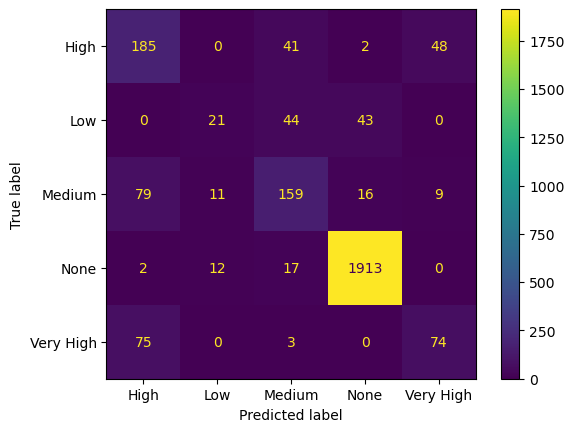

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(random_state=2023)

param_grid = {
    'n_estimators': [300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}


grid_searchGBM = GridSearchCV(gbm, param_grid, cv=3, refit=True, verbose=3)
grid_searchGBM.fit(X_train_normalize, y_train_normalize)
grid_predictionGBM = grid_searchGBM.predict(X_test_normalize)

print("Best estimator: ", grid_searchGBM.best_estimator_)

print(classification_report(y_test_normalize, grid_predictionGBM))
ConfusionMatrixDisplay.from_predictions(y_test_normalize, grid_predictionGBM)
plt.show()

#### Previsão

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(learning_rate=0.01, min_samples_split=5, n_estimators=300, random_state=2023)
gbm.fit(X_treino_normalize, y_treino_normalize)

predictionGBM = gbm.predict(X_teste_normalize)

### Criação do ficheiro de submissão

In [19]:
with open('results.csv', 'w') as results:
    results.write('RowId,Result\n')
    i = 1
    for p in predictionGBM:
        results.write(f'{i},{p}\n')
        i+=1